In [466]:
#Package Delivery
import sqlite3
conn = sqlite3.connect('database.sqlite')
c = conn.cursor()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [90]:
# Retrieve your data
c.execute("""SELECT Unique_Team_ID, TeamName FROM Unique_Teams""")
unique_teams_df = pd.DataFrame(c.fetchall())
unique_teams_df.columns = [x[0] for x in c.description]
unique_teams_df.head()

,Unique_Team_ID,TeamName
0,1,Bayern Munich
1,2,Dortmund
2,3,Leverkusen
3,4,RB Leipzig
4,5,Schalke 04


In [91]:
# Create a list a unique teams
unique_teams = [tuple(x) for x in unique_teams_df.values]
unique_teams[0]

(1, 'Bayern Munich')

In [501]:
teams = c.execute("""SELECT TeamName FROM Teams WHERE Season = 2011""")
teams_11 = pd.DataFrame(c.fetchall())
teams_11.columns = [x[0] for x in c.description]
teams_11.head()

,TeamName
0,Bayern Munich
1,Dortmund
2,Leverkusen
3,Schalke 04
4,Werder Bremen


In [502]:
teams11 = teams_11.TeamName.tolist()

In [503]:
c.execute("""SELECT * FROM matches WHERE Season = 2011""")
match_11 = pd.DataFrame(c.fetchall())
match_11.columns = [x[0] for x in c.description]
match_11.head()

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,A,24,25,11,335600000,13980000,75000
1,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,24,25,11,335600000,13980000,75000
2,1211,1,Bayern Munich,D1,2011,2011-08-20,Bayern Munich,Hamburg,5,0,H,24,25,11,335600000,13980000,75000
3,1104,1,Bayern Munich,D1,2011,2011-08-27,Kaiserslautern,Bayern Munich,0,3,A,24,25,11,335600000,13980000,75000
4,1197,1,Bayern Munich,D1,2011,2011-09-10,Bayern Munich,Freiburg,7,0,H,24,25,11,335600000,13980000,75000


In [497]:
matches_11 = match_11.iloc[:,0]
matches_11.head()

0    1491
1    1094
2    1211
3    1104
4    1197
Name: Match_ID, dtype: int64

In [498]:
hometeam_matches = match_11[['Match_ID','HomeTeam', 'FTHG']]
hometeam_matches[:3]

,Match_ID,HomeTeam,FTHG
0,1491,Bayern Munich,0
1,1094,Wolfsburg,0
2,1211,Bayern Munich,5


In [499]:
home_matches = [tuple(x) for x in hometeam_matches.values]
home_matches[:5]

[(1491, 'Bayern Munich', 0),
 (1094, 'Wolfsburg', 0),
 (1211, 'Bayern Munich', 5),
 (1104, 'Kaiserslautern', 0),
 (1197, 'Bayern Munich', 7)]

In [99]:
#THIS RETURNS A DICTIONARY WITH THE GOALS AND THE MATCH ID


def get_goals(teams, matches):
    goals = []
    for item in teams:
        for tup in matches:
            if item == tup[1]:
                goals.append({item:tup[2]})

    return goals

In [100]:
get_goals(teams11, home_matches)

[{'Bayern Munich': 0},
 {'Bayern Munich': 3},
 {'Bayern Munich': 7},
 {'Bayern Munich': 5},
 {'Bayern Munich': 2},
 {'Bayern Munich': 3},
 {'Bayern Munich': 4},
 {'Bayern Munich': 2},
 {'Bayern Munich': 2},
 {'Bayern Munich': 4},
 {'Bayern Munich': 2},
 {'Bayern Munich': 4},
 {'Bayern Munich': 0},
 {'Bayern Munich': 2},
 {'Bayern Munich': 0},
 {'Bayern Munich': 2},
 {'Bayern Munich': 7},
 {'Dortmund': 1},
 {'Dortmund': 5},
 {'Dortmund': 4},
 {'Dortmund': 3},
 {'Dortmund': 1},
 {'Dortmund': 1},
 {'Dortmund': 2},
 {'Dortmund': 2},
 {'Dortmund': 4},
 {'Dortmund': 1},
 {'Dortmund': 3},
 {'Dortmund': 1},
 {'Dortmund': 2},
 {'Dortmund': 5},
 {'Dortmund': 2},
 {'Dortmund': 4},
 {'Dortmund': 3},
 {'Leverkusen': 2},
 {'Leverkusen': 0},
 {'Leverkusen': 1},
 {'Leverkusen': 0},
 {'Leverkusen': 2},
 {'Leverkusen': 3},
 {'Leverkusen': 0},
 {'Leverkusen': 0},
 {'Leverkusen': 2},
 {'Leverkusen': 1},
 {'Leverkusen': 1},
 {'Leverkusen': 3},
 {'Leverkusen': 3},
 {'Leverkusen': 3},
 {'Leverkusen': 1},
 {'

In [101]:
def add_goals(teams, matches):
    added_goals = get_goals(teams, matches)
    match_df = pd.DataFrame(added_goals)
    return match_df.sum()

In [102]:
add_goals(teams11, home_matches)
home_goals = add_goals(teams11, home_matches)

In [103]:
awayteam_matches = match_11[['Match_ID', 'AwayTeam', 'FTAG']]
awayteam_matches = [tuple(x) for x in hometeam_matches.values]
awayteam_matches[:4]

[(1092, 'Nurnberg', 0),
 (1093, 'Stuttgart', 1),
 (1094, 'Wolfsburg', 0),
 (1095, 'Mainz', 3)]

In [104]:
get_goals(teams11, awayteam_matches)

[{'Bayern Munich': 0},
 {'Bayern Munich': 3},
 {'Bayern Munich': 7},
 {'Bayern Munich': 5},
 {'Bayern Munich': 2},
 {'Bayern Munich': 3},
 {'Bayern Munich': 4},
 {'Bayern Munich': 2},
 {'Bayern Munich': 2},
 {'Bayern Munich': 4},
 {'Bayern Munich': 2},
 {'Bayern Munich': 4},
 {'Bayern Munich': 0},
 {'Bayern Munich': 2},
 {'Bayern Munich': 0},
 {'Bayern Munich': 2},
 {'Bayern Munich': 7},
 {'Dortmund': 1},
 {'Dortmund': 5},
 {'Dortmund': 4},
 {'Dortmund': 3},
 {'Dortmund': 1},
 {'Dortmund': 1},
 {'Dortmund': 2},
 {'Dortmund': 2},
 {'Dortmund': 4},
 {'Dortmund': 1},
 {'Dortmund': 3},
 {'Dortmund': 1},
 {'Dortmund': 2},
 {'Dortmund': 5},
 {'Dortmund': 2},
 {'Dortmund': 4},
 {'Dortmund': 3},
 {'Leverkusen': 2},
 {'Leverkusen': 0},
 {'Leverkusen': 1},
 {'Leverkusen': 0},
 {'Leverkusen': 2},
 {'Leverkusen': 3},
 {'Leverkusen': 0},
 {'Leverkusen': 0},
 {'Leverkusen': 2},
 {'Leverkusen': 1},
 {'Leverkusen': 1},
 {'Leverkusen': 3},
 {'Leverkusen': 3},
 {'Leverkusen': 3},
 {'Leverkusen': 1},
 {'

In [479]:
away_goals = add_goals(teams11, awayteam_matches)
away_goals

Aachen                15.0
Augsburg              20.0
Bayern Munich         49.0
Bochum                23.0
Braunschweig          21.0
Cottbus               18.0
Dortmund              44.0
Dresden               30.0
Duisburg              23.0
Ein Frankfurt         38.0
Erzgebirge Aue        19.0
FC Koln               20.0
Fortuna Dusseldorf    35.0
Frankfurt FSV         20.0
Freiburg              24.0
Greuther Furth        46.0
Hamburg               19.0
Hannover              31.0
Hansa Rostock         20.0
Hertha                19.0
Hoffenheim            21.0
Ingolstadt            28.0
Kaiserslautern        12.0
Karlsruhe             23.0
Leverkusen            28.0
M'gladbach            29.0
Mainz                 27.0
Munich 1860           35.0
Nurnberg              22.0
Paderborn             28.0
Schalke 04            47.0
St Pauli              36.0
Stuttgart             36.0
Union Berlin          30.0
Werder Bremen         31.0
Wolfsburg             29.0
dtype: float64

In [106]:
home = pd.DataFrame(home_goals)
away = pd.DataFrame(away_goals)
merged = away.merge(home, left_index=True, right_index=True, how='inner')
Team_Goals = merged.rename(columns = {'0_x':'away','0_y':'home'})

In [107]:
Team_Goals['total_goals'] = Team_Goals.apply(lambda row: row.away + row.home, axis=1)
Team_Goals.head()

,away,home,total_goals
Aachen,15.0,15.0,30.0
Augsburg,20.0,20.0,40.0
Bayern Munich,49.0,49.0,98.0
Bochum,23.0,23.0,46.0
Braunschweig,21.0,21.0,42.0


In [491]:
Total_Goals = Team_Goals.drop(columns =['away','home'])
Total_Goals

,total_goals
Aachen,30.0
Augsburg,40.0
Bayern Munich,98.0
Bochum,46.0
Braunschweig,42.0
Cottbus,36.0
Dortmund,88.0
Dresden,60.0
Duisburg,46.0
Ein Frankfurt,76.0


In [483]:
c.execute("""SELECT Unique_Team, count(FTR) as Total_Games
                                 from Flatview_Advanced
                                 where Season = '2011'
                                 group by Unique_Team_ID;
          """
         )
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df.head()

,Unique_Team,Total_Games
0,Bayern Munich,34
1,Dortmund,34
2,Leverkusen,34
3,Schalke 04,34
4,M'gladbach,34


In [485]:
# Drop all but H from FTR
# Group by Team and count won Home Games

HomeWins = match_11[['Match_ID', 'HomeTeam', 'FTR']]
HomeWins.head()

,Match_ID,HomeTeam,FTR
0,1092,Nurnberg,A
1,1093,Stuttgart,A
2,1094,Wolfsburg,A
3,1095,Mainz,H
4,1096,Freiburg,D


In [475]:
HomeWins = HomeWins[~HomeWins.FTR.str.contains('A|D')]

In [487]:
HomeWins = HomeWins.groupby('HomeTeam').count()
HomeWins.head()

,Match_ID,FTR
HomeTeam,,
Aachen,1,1
Arsenal,1,1
Aston Villa,1,1
Augsburg,1,1
Bayern Munich,1,1


In [114]:
HomeWins.reset_index()

,HomeTeam,Match_ID,FTR
0,Aachen,4,4
1,Arsenal,12,12
2,Aston Villa,4,4
3,Augsburg,6,6
4,Bayern Munich,14,14
5,Blackburn,6,6
6,Bochum,7,7
7,Bolton,4,4
8,Braunschweig,6,6
9,Chelsea,12,12


In [115]:
HomeWins = HomeWins.rename(columns={'FTR': 'HomeWins'})
HomeWins

,Match_ID,HomeWins
HomeTeam,,
Aachen,4,4
Arsenal,12,12
Aston Villa,4,4
Augsburg,6,6
Bayern Munich,14,14
Blackburn,6,6
Bochum,7,7
Bolton,4,4
Braunschweig,6,6


In [116]:
HomeWins = HomeWins.drop(columns=['Match_ID'])

In [117]:
HomeWins.head()

,HomeWins
HomeTeam,
Aachen,4
Arsenal,12
Aston Villa,4
Augsburg,6
Bayern Munich,14


In [118]:
AwayWins = match_11[['Match_ID', 'AwayTeam', 'FTR']]
AwayWins.head()

,Match_ID,AwayTeam,FTR
0,1092,Bayern Munich,A
1,1093,Bayern Munich,A
2,1094,Bayern Munich,A
3,1095,Bayern Munich,H
4,1096,Bayern Munich,D


In [119]:
AwayWins = AwayWins[~AwayWins.FTR.str.contains('D')]
AwayWins = AwayWins[~AwayWins.FTR.str.contains('H')]
AwayWins.head()

,Match_ID,AwayTeam,FTR
0,1092,Bayern Munich,A
1,1093,Bayern Munich,A
2,1094,Bayern Munich,A
7,1099,Bayern Munich,A
8,1100,Bayern Munich,A


In [120]:
AwayWins = AwayWins.groupby('AwayTeam').count()
AwayWins.head()

,Match_ID,FTR
AwayTeam,,
Aachen,2,2
Arsenal,9,9
Aston Villa,3,3
Augsburg,2,2
Bayern Munich,9,9


In [121]:
AwayWins.reset_index()

,AwayTeam,Match_ID,FTR
0,Aachen,2,2
1,Arsenal,9,9
2,Aston Villa,3,3
3,Augsburg,2,2
4,Bayern Munich,9,9
5,Blackburn,2,2
6,Bochum,3,3
7,Bolton,6,6
8,Braunschweig,4,4
9,Chelsea,6,6


In [122]:
AwayWins = AwayWins.rename(columns={'FTR': 'AwayWins'})
AwayWins

,Match_ID,AwayWins
AwayTeam,,
Aachen,2,2
Arsenal,9,9
Aston Villa,3,3
Augsburg,2,2
Bayern Munich,9,9
Blackburn,2,2
Bochum,3,3
Bolton,6,6
Braunschweig,4,4


In [123]:
AwayWins = AwayWins.drop(columns=['Match_ID'])
AwayWins.head()

,AwayWins
AwayTeam,
Aachen,2
Arsenal,9
Aston Villa,3
Augsburg,2
Bayern Munich,9


In [124]:
HomeWins.head()

,HomeWins
HomeTeam,
Aachen,4
Arsenal,12
Aston Villa,4
Augsburg,6
Bayern Munich,14


In [125]:
AwayWins.head()

,AwayWins
AwayTeam,
Aachen,2
Arsenal,9
Aston Villa,3
Augsburg,2
Bayern Munich,9


In [150]:
Wins = HomeWins.join(AwayWins, lsuffix='_Home', rsuffix='_Away')

In [151]:
Wins.head()

,HomeWins,AwayWins
HomeTeam,,
Aachen,4,2
Arsenal,12,9
Aston Villa,4,3
Augsburg,6,2
Bayern Munich,14,9


In [152]:
Wins = Wins.rename_axis('Team')
Wins

,HomeWins,AwayWins
Team,,
Aachen,4,2
Arsenal,12,9
Aston Villa,4,3
Augsburg,6,2
Bayern Munich,14,9
Blackburn,6,2
Bochum,7,3
Bolton,4,6
Braunschweig,6,4


In [153]:
Wins['HomeWins']

Team
Aachen                 4
Arsenal               12
Aston Villa            4
Augsburg               6
Bayern Munich         14
Blackburn              6
Bochum                 7
Bolton                 4
Braunschweig           6
Chelsea               12
Cottbus                4
Dortmund              14
Dresden                8
Duisburg               8
Ein Frankfurt         11
Erzgebirge Aue         5
Everton               10
FC Koln                5
Fortuna Dusseldorf    11
Frankfurt FSV          3
Freiburg               6
Fulham                10
Greuther Furth        14
Hamburg                3
Hannover              10
Hansa Rostock          3
Hertha                 4
Hoffenheim             4
Ingolstadt             6
Kaiserslautern         2
Karlsruhe              8
Leverkusen             8
Liverpool              6
M'gladbach             9
Mainz                  7
Man City              18
Man United            15
Munich 1860           10
Newcastle             11
Norwich             

In [154]:
Wins['AwayWins']

Team
Aachen                 2
Arsenal                9
Aston Villa            3
Augsburg               2
Bayern Munich          9
Blackburn              2
Bochum                 3
Bolton                 6
Braunschweig           4
Chelsea                6
Cottbus                4
Dortmund              11
Dresden                4
Duisburg               2
Ein Frankfurt          9
Erzgebirge Aue         3
Everton                5
FC Koln                3
Fortuna Dusseldorf     5
Frankfurt FSV          4
Freiburg               4
Fulham                 4
Greuther Furth         6
Hamburg                5
Hannover               2
Hansa Rostock          2
Hertha                 3
Hoffenheim             6
Ingolstadt             2
Kaiserslautern         2
Karlsruhe              1
Leverkusen             7
Liverpool              8
M'gladbach             8
Mainz                  2
Man City              10
Man United            13
Munich 1860            7
Newcastle              8
Norwich             

In [155]:
Wins['TotalWins'] = Wins['HomeWins'] + Wins['AwayWins']
print(Wins)

                    HomeWins  AwayWins  TotalWins
Team                                             
Aachen                     4         2          6
Arsenal                   12         9         21
Aston Villa                4         3          7
Augsburg                   6         2          8
Bayern Munich             14         9         23
Blackburn                  6         2          8
Bochum                     7         3         10
Bolton                     4         6         10
Braunschweig               6         4         10
Chelsea                   12         6         18
Cottbus                    4         4          8
Dortmund                  14        11         25
Dresden                    8         4         12
Duisburg                   8         2         10
Ein Frankfurt             11         9         20
Erzgebirge Aue             5         3          8
Everton                   10         5         15
FC Koln                    5         3          8


In [156]:
Wins['TotalWins']

Team
Aachen                 6
Arsenal               21
Aston Villa            7
Augsburg               8
Bayern Munich         23
Blackburn              8
Bochum                10
Bolton                10
Braunschweig          10
Chelsea               18
Cottbus                8
Dortmund              25
Dresden               12
Duisburg              10
Ein Frankfurt         20
Erzgebirge Aue         8
Everton               15
FC Koln                8
Fortuna Dusseldorf    16
Frankfurt FSV          7
Freiburg              10
Fulham                14
Greuther Furth        20
Hamburg                8
Hannover              12
Hansa Rostock          5
Hertha                 7
Hoffenheim            10
Ingolstadt             8
Kaiserslautern         4
Karlsruhe              9
Leverkusen            15
Liverpool             14
M'gladbach            17
Mainz                  9
Man City              28
Man United            28
Munich 1860           17
Newcastle             19
Norwich             

In [168]:
len(Wins)

56

In [209]:
match_11

Match_ID      992
Div           992
Season        992
Date          992
HomeTeam      992
AwayTeam      992
FTHG          992
FTAG          992
FTR           992
TotalGames      0
dtype: int64

In [216]:
Wins['TotalGames'] = 34

In [217]:
Wins

,HomeWins,AwayWins,TotalWins,TotalGames,TotalLosses
Team,,,,,
Aachen,4,2,6,34,28
Arsenal,12,9,21,34,17
Aston Villa,4,3,7,34,31
Augsburg,6,2,8,34,26
Bayern Munich,14,9,23,34,11
Blackburn,6,2,8,34,30
Bochum,7,3,10,34,24
Bolton,4,6,10,34,28
Braunschweig,6,4,10,34,24


In [218]:
Wins['TotalLosses'] = Wins['TotalGames'] - Wins['TotalWins']

In [228]:
Wins.reset_index()

,Team,HomeWins,AwayWins,TotalWins,TotalGames,TotalLosses
0,Aachen,4,2,6,34,28
1,Arsenal,12,9,21,34,13
2,Aston Villa,4,3,7,34,27
3,Augsburg,6,2,8,34,26
4,Bayern Munich,14,9,23,34,11
5,Blackburn,6,2,8,34,26
6,Bochum,7,3,10,34,24
7,Bolton,4,6,10,34,24
8,Braunschweig,6,4,10,34,24
9,Chelsea,12,6,18,34,16


In [232]:
Wins.head()

,HomeWins,AwayWins,TotalWins,TotalGames,TotalLosses
Team,,,,,
Aachen,4,2,6,34,28
Arsenal,12,9,21,34,13
Aston Villa,4,3,7,34,27
Augsburg,6,2,8,34,26
Bayern Munich,14,9,23,34,11


In [391]:
RainyGames = match_11[['Match_ID', 'HomeTeam', 'AwayTeam', 'FTR']]
RainyGames.head()

,Match_ID,HomeTeam,AwayTeam,FTR
0,1092,Nurnberg,Bayern Munich,A
1,1093,Stuttgart,Bayern Munich,A
2,1094,Wolfsburg,Bayern Munich,A
3,1095,Mainz,Bayern Munich,H
4,1096,Freiburg,Bayern Munich,D


In [392]:
RainyDays = (1100,
1104,
1109,
1116,
1118,
1126,
1145,
1146,
1175,
1177,
1178,
1191,
1203,
1222,
1240,
1249,
1250,
1261,
1263,
1290,
1298,
1303,
1304,
1335,
1343,
1345,
1349,
1362,
1370,
1380,
1385,
1387,
1395,
1411,
1421,
1424,
1429,
1442,
1448,
1449,
1473,
1482,
1505,
1525,
1529,
1541,
1549,
1563,
1564,
1578,
1584,
1587,
1590,
1596,
1602,
1604,
1609,
1619,
1633,
1654,
1656,
1660,
1667,
1676,
1677,
1701,
1702,
44501,
44502,
44503,
44514,
44515,
44516,
44517,
44518,
44519,
44531,
44532,
44533,
44540,
44541,
44542,
44543,
44614,
44615,
44616,
44617,
44618,
44619,
44620,
44621,
44624,
44625,
44626,
44627,
44628,
44629,
44630,
44650,
44651,
44652,
44653,
44656,
44657,
44658,
44659,
44660,
44661,
44662,
44674,
44682,
44683,
44684,
44685,
44686,
44687,
44688,
44692,
44693)

In [393]:
RainyGames['RainyWins'] = RainyGames['Match_ID'].isin(RainyDays)
RainyGames

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Match_ID,HomeTeam,AwayTeam,FTR,RainyWins
0,1092,Nurnberg,Bayern Munich,A,False
1,1093,Stuttgart,Bayern Munich,A,False
2,1094,Wolfsburg,Bayern Munich,A,False
3,1095,Mainz,Bayern Munich,H,False
4,1096,Freiburg,Bayern Munich,D,False
5,1097,M'gladbach,Bayern Munich,H,False
6,1098,Hamburg,Bayern Munich,D,False
7,1099,Werder Bremen,Bayern Munich,A,False
8,1100,Schalke 04,Bayern Munich,A,True
9,1101,Hannover,Bayern Munich,H,False


In [394]:
RainyGames['RainyWins'].value_counts()

False    873
True     119
Name: RainyWins, dtype: int64

In [395]:
RainyGames = RainyGames[RainyGames.RainyWins]
RainyGames

,Match_ID,HomeTeam,AwayTeam,FTR,RainyWins
8,1100,Schalke 04,Bayern Munich,A,True
12,1104,Kaiserslautern,Bayern Munich,A,True
17,1109,Leverkusen,Dortmund,D,True
24,1116,M'gladbach,Dortmund,D,True
26,1118,Hannover,Dortmund,H,True
34,1126,Hansa Rostock,Dresden,D,True
53,1145,Cottbus,Duisburg,D,True
54,1146,Karlsruhe,Duisburg,H,True
83,1175,Munich 1860,Ein Frankfurt,H,True
85,1177,Stuttgart,FC Koln,D,True


In [396]:
RainyHomeGames = pd.Series(RainyWins['HomeTeam'].value_counts())
RainyHomeGames

Munich 1860           5
Aston Villa           5
QPR                   5
Man City              4
Fulham                4
Karlsruhe             4
Kaiserslautern        4
Wigan                 3
Tottenham             3
Sunderland            3
Bochum                3
Hansa Rostock         3
Newcastle             3
Blackburn             3
West Brom             3
Duisburg              3
Hannover              2
Stoke                 2
Ingolstadt            2
Aachen                2
Greuther Furth        2
Liverpool             2
Hertha                2
Nurnberg              2
Ein Frankfurt         2
Chelsea               2
Union Berlin          2
M'gladbach            2
Dresden               2
Everton               2
Hoffenheim            2
Braunschweig          2
Wolfsburg             2
FC Koln               2
Bayern Munich         2
Freiburg              2
Man United            2
Norwich               2
Leverkusen            2
Augsburg              1
St Pauli              1
Schalke 04      

In [397]:
RainyAwayGames = pd.Series(RainyWins['AwayTeam'].value_counts())
RainyAwayGames

Man United            5
Arsenal               4
Frankfurt FSV         4
Chelsea               4
Swansea               4
Erzgebirge Aue        3
West Brom             3
Liverpool             3
Mainz                 3
Sunderland            3
Stoke                 3
Paderborn             3
Norwich               3
Bolton                3
FC Koln               3
Dortmund              3
Everton               3
Newcastle             3
Werder Bremen         3
Hansa Rostock         3
Karlsruhe             3
Schalke 04            3
Augsburg              2
Duisburg              2
Blackburn             2
Hannover              2
Ingolstadt            2
Aachen                2
Greuther Furth        2
Braunschweig          2
Munich 1860           2
Wolves                2
Man City              2
QPR                   2
Union Berlin          2
Bayern Munich         2
Bochum                2
Wolfsburg             2
Fortuna Dusseldorf    2
Fulham                1
Ein Frankfurt         1
Leverkusen      

In [398]:
TotalRainyGames = RainyAwayGames.add(RainyHomeGames, fill_value=0)
len(TotalRainyGames)

56

In [399]:
RainyGames.head()

,Match_ID,HomeTeam,AwayTeam,FTR,RainyWins
8,1100,Schalke 04,Bayern Munich,A,True
12,1104,Kaiserslautern,Bayern Munich,A,True
17,1109,Leverkusen,Dortmund,D,True
24,1116,M'gladbach,Dortmund,D,True
26,1118,Hannover,Dortmund,H,True


In [400]:
RainyHomeWins = RainyGames[['Match_ID', 'HomeTeam', 'FTR']]
RainyHomeWins

,Match_ID,HomeTeam,FTR
8,1100,Schalke 04,A
12,1104,Kaiserslautern,A
17,1109,Leverkusen,D
24,1116,M'gladbach,D
26,1118,Hannover,H
34,1126,Hansa Rostock,D
53,1145,Cottbus,D
54,1146,Karlsruhe,H
83,1175,Munich 1860,H
85,1177,Stuttgart,D


In [401]:
RainyHomeWins = RainyHomeWins[~RainyHomeWins.FTR.str.contains('D')]
RainyHomeWins = RainyHomeWins[~RainyHomeWins.FTR.str.contains('A')]
RainyHomeWins.head()

,Match_ID,HomeTeam,FTR
26,1118,Hannover,H
54,1146,Karlsruhe,H
83,1175,Munich 1860,H
86,1178,Bayern Munich,H
148,1240,Nurnberg,H


In [402]:
RainyHomeWins = pd.Series(RainyHomeWins['HomeTeam'].value_counts())
RainyHomeWins

Munich 1860       5
Man City          4
Tottenham         3
Chelsea           2
Nurnberg          2
Dresden           2
Liverpool         2
Bayern Munich     2
Greuther Furth    2
Sunderland        2
Freiburg          1
Hannover          1
Everton           1
Blackburn         1
Newcastle         1
Braunschweig      1
Ein Frankfurt     1
Norwich           1
Duisburg          1
M'gladbach        1
Dortmund          1
Man United        1
Bochum            1
Stoke             1
Leverkusen        1
Augsburg          1
Wolfsburg         1
St Pauli          1
Union Berlin      1
Karlsruhe         1
Wigan             1
Fulham            1
Paderborn         1
Name: HomeTeam, dtype: int64

In [403]:
RainyGames.head()
RainyGames

,Match_ID,HomeTeam,AwayTeam,FTR,RainyWins
8,1100,Schalke 04,Bayern Munich,A,True
12,1104,Kaiserslautern,Bayern Munich,A,True
17,1109,Leverkusen,Dortmund,D,True
24,1116,M'gladbach,Dortmund,D,True
26,1118,Hannover,Dortmund,H,True
34,1126,Hansa Rostock,Dresden,D,True
53,1145,Cottbus,Duisburg,D,True
54,1146,Karlsruhe,Duisburg,H,True
83,1175,Munich 1860,Ein Frankfurt,H,True
85,1177,Stuttgart,FC Koln,D,True


In [404]:
RainyAwayWins = RainyGames[['Match_ID', 'AwayTeam', 'FTR']]
RainyAwayWins.head()

,Match_ID,AwayTeam,FTR
8,1100,Bayern Munich,A
12,1104,Bayern Munich,A
17,1109,Dortmund,D
24,1116,Dortmund,D
26,1118,Dortmund,H


In [405]:
RainyAwayWins = RainyAwayWins[~RainyAwayWins.FTR.str.contains('D')]
RainyAwayWins = RainyAwayWins[~RainyAwayWins.FTR.str.contains('H')]
RainyAwayWins.head()

,Match_ID,AwayTeam,FTR
8,1100,Bayern Munich,A
12,1104,Bayern Munich,A
99,1191,FC Koln,A
198,1290,Nurnberg,A
211,1303,Schalke 04,A


In [406]:
RainyAwayWins = pd.Series(RainyAwayWins['AwayTeam'].value_counts())
RainyAwayWins

Man United        4
Everton           3
Paderborn         3
West Brom         2
Bayern Munich     2
Chelsea           2
Arsenal           2
Wigan             1
Nurnberg          1
Sunderland        1
Tottenham         1
Swansea           1
Werder Bremen     1
Norwich           1
FC Koln           1
Frankfurt FSV     1
Greuther Furth    1
Cottbus           1
Liverpool         1
Stoke             1
Schalke 04        1
Braunschweig      1
St Pauli          1
Aachen            1
Bolton            1
Name: AwayTeam, dtype: int64

In [407]:
TotalRainyWins = RainyAwayWins.add(RainyHomeWins, fill_value=0)
len(TotalRainyWins)

43

In [408]:
TotalRainyWins

Aachen            1.0
Arsenal           2.0
Augsburg          1.0
Bayern Munich     4.0
Blackburn         1.0
Bochum            1.0
Bolton            1.0
Braunschweig      2.0
Chelsea           4.0
Cottbus           1.0
Dortmund          1.0
Dresden           2.0
Duisburg          1.0
Ein Frankfurt     1.0
Everton           4.0
FC Koln           1.0
Frankfurt FSV     1.0
Freiburg          1.0
Fulham            1.0
Greuther Furth    3.0
Hannover          1.0
Karlsruhe         1.0
Leverkusen        1.0
Liverpool         3.0
M'gladbach        1.0
Man City          4.0
Man United        5.0
Munich 1860       5.0
Newcastle         1.0
Norwich           2.0
Nurnberg          3.0
Paderborn         4.0
Schalke 04        1.0
St Pauli          2.0
Stoke             2.0
Sunderland        3.0
Swansea           1.0
Tottenham         4.0
Union Berlin      1.0
Werder Bremen     1.0
West Brom         2.0
Wigan             2.0
Wolfsburg         1.0
dtype: float64

In [409]:
len(TotalRainyGames)

56

In [410]:
TotalRainyGames

Aachen                4.0
Arsenal               5.0
Aston Villa           5.0
Augsburg              3.0
Bayern Munich         4.0
Blackburn             5.0
Bochum                5.0
Bolton                4.0
Braunschweig          4.0
Chelsea               6.0
Cottbus               2.0
Dortmund              4.0
Dresden               3.0
Duisburg              5.0
Ein Frankfurt         3.0
Erzgebirge Aue        4.0
Everton               5.0
FC Koln               5.0
Fortuna Dusseldorf    3.0
Frankfurt FSV         5.0
Freiburg              3.0
Fulham                5.0
Greuther Furth        4.0
Hamburg               2.0
Hannover              4.0
Hansa Rostock         6.0
Hertha                3.0
Hoffenheim            2.0
Ingolstadt            4.0
Kaiserslautern        5.0
Karlsruhe             7.0
Leverkusen            3.0
Liverpool             5.0
M'gladbach            2.0
Mainz                 3.0
Man City              6.0
Man United            7.0
Munich 1860           7.0
Newcastle   

In [412]:
type(TotalRainyWins)

pandas.core.series.Series

In [413]:
type(TotalRainyGames)

pandas.core.series.Series

In [415]:
RainyTable = pd.concat([TotalRainyWins, TotalRainyGames], axis=1, sort=True)
RainyTable

,0,1
Aachen,1.0,4.0
Arsenal,2.0,5.0
Aston Villa,NaN,5.0
Augsburg,1.0,3.0
Bayern Munich,4.0,4.0
Blackburn,1.0,5.0
Bochum,1.0,5.0
Bolton,1.0,4.0
Braunschweig,2.0,4.0
Chelsea,4.0,6.0


In [417]:
RainyTable.columns = ['TotalRainyWins', 'TotalRainyGames']
RainyTable

,TotalRainyWins,TotalRainyGames
Aachen,1.0,4.0
Arsenal,2.0,5.0
Aston Villa,NaN,5.0
Augsburg,1.0,3.0
Bayern Munich,4.0,4.0
Blackburn,1.0,5.0
Bochum,1.0,5.0
Bolton,1.0,4.0
Braunschweig,2.0,4.0
Chelsea,4.0,6.0


In [421]:
RainyTable = RainyTable.fillna(0)

In [425]:
RainyTable['RainyWinPercentage'] = round((RainyTable['TotalRainyWins'] / RainyTable['TotalRainyGames']) * 100, )
RainyTable

,TotalRainyWins,TotalRainyGames,RainyWinPercentage
Aachen,1.0,4.0,25.0
Arsenal,2.0,5.0,40.0
Aston Villa,0.0,5.0,0.0
Augsburg,1.0,3.0,33.0
Bayern Munich,4.0,4.0,100.0
Blackburn,1.0,5.0,20.0
Bochum,1.0,5.0,20.0
Bolton,1.0,4.0,25.0
Braunschweig,2.0,4.0,50.0
Chelsea,4.0,6.0,67.0


In [430]:
Wins.head()

,HomeWins,AwayWins,TotalWins,TotalGames,TotalLosses
Team,,,,,
Aachen,4,2,6,34,28
Arsenal,12,9,21,34,13
Aston Villa,4,3,7,34,27
Augsburg,6,2,8,34,26
Bayern Munich,14,9,23,34,11


In [435]:
Wins['TeamNames'] = 'Default'
Wins.head()

,HomeWins,AwayWins,TotalWins,TotalGames,TotalLosses,TeamNames
Team,,,,,,
Aachen,4,2,6,34,28,Default
Arsenal,12,9,21,34,13,Default
Aston Villa,4,3,7,34,27,Default
Augsburg,6,2,8,34,26,Default
Bayern Munich,14,9,23,34,11,Default


In [437]:
Wins['TeamNames'] = Wins.index
Wins

,HomeWins,AwayWins,TotalWins,TotalGames,TotalLosses,TeamNames
Team,,,,,,
Aachen,4,2,6,34,28,Aachen
Arsenal,12,9,21,34,13,Arsenal
Aston Villa,4,3,7,34,27,Aston Villa
Augsburg,6,2,8,34,26,Augsburg
Bayern Munich,14,9,23,34,11,Bayern Munich
Blackburn,6,2,8,34,26,Blackburn
Bochum,7,3,10,34,24,Bochum
Bolton,4,6,10,34,24,Bolton
Braunschweig,6,4,10,34,24,Braunschweig


In [494]:
Wins['Index'] = np.arange(len(Wins))
Wins.head()

,HomeWins,AwayWins,TotalWins,TotalGames,TotalLosses,TeamNames,Index
Team,,,,,,,
Man United,15,13,28,34,6,Man United,0
Man City,18,10,28,34,6,Man City,1
Dortmund,14,11,25,34,9,Dortmund,2
Bayern Munich,14,9,23,34,11,Bayern Munich,3
Arsenal,12,9,21,34,13,Arsenal,4


In [442]:
Wins.set_index(['Index'])

,HomeWins,AwayWins,TotalWins,TotalGames,TotalLosses,TeamNames
Index,,,,,,
0,4,2,6,34,28,Aachen
1,12,9,21,34,13,Arsenal
2,4,3,7,34,27,Aston Villa
3,6,2,8,34,26,Augsburg
4,14,9,23,34,11,Bayern Munich
5,6,2,8,34,26,Blackburn
6,7,3,10,34,24,Bochum
7,4,6,10,34,24,Bolton
8,6,4,10,34,24,Braunschweig


In [454]:
Wins = Wins.sort_values(['TotalWins'], ascending=False)

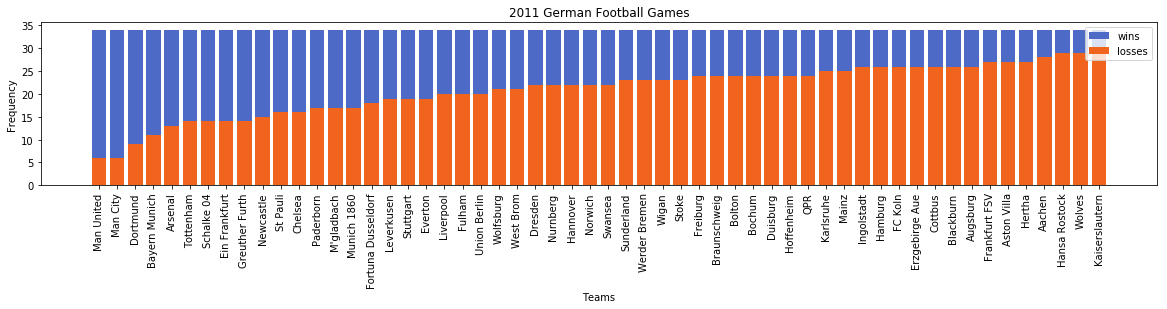

In [463]:
teams = Wins['TeamNames']
losses = Wins['TotalLosses']
wins = Wins['TotalWins']
draws = Wins['TotalGames'] - (Wins['TotalWins'] + Wins['TotalLosses'])
ind = [x for x, _ in enumerate(teams)]


plt.figure(figsize=(20, 3))  # width:20, height:3
plt.bar(ind, wins, width=0.8, label='wins', color='#4D6BC6', bottom=draws+losses)
plt.bar(ind, losses, width=0.8, label='losses', color='#F1641E')

plt.xticks(ind, teams, rotation='vertical')
plt.ylabel("Frequency")
plt.xlabel("Teams")
plt.legend(loc="upper right")
plt.title("2011 German Football Games")


plt.show()